In [24]:
import pandas as pd

sensus={
    'tinggi':[158,170,183,191,155,163,180,158,179],
    'berat': [64,86,84,80,49,59,67,54,67],
    'jk':[
        'pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita'
    ]
}

sensus_df=pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,179,67,wanita


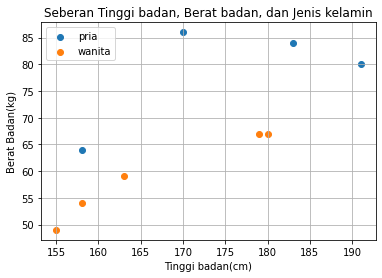

In [25]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
for jk,d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'],label=jk)

plt.legend(loc='upper left')
plt.title('Seberan Tinggi badan, Berat badan, dan Jenis kelamin')
plt.xlabel('Tinggi badan(cm)')
plt.ylabel('Berat Badan(kg)')
plt.grid(True)
plt.show()

In [26]:
import numpy as np 

x_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jk'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [179  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [27]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train=lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [29]:
y_train=y_train.flatten()
print(f'y_train:{y_train}')

y_train:[0 0 0 0 1 1 1 1 1]


In [30]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
tinggi_badan = 155
berat_badan=70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1,-1)
X_new

array([[155,  70]])

In [32]:
y_new=model.predict(X_new)
y_new

array([1])

In [33]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

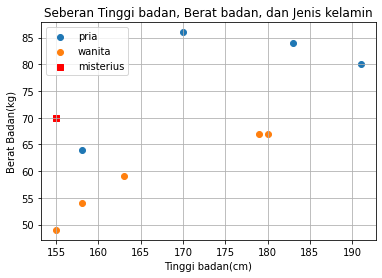

In [35]:
fig, ax= plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'],label=jk)
    
plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Seberan Tinggi badan, Berat badan, dan Jenis kelamin')
plt.xlabel('Tinggi badan(cm)')
plt.ylabel('Berat Badan(kg)')
plt.grid(True)
plt.show()

In [37]:
misterius=np.array([tinggi_badan,berat_badan])
misterius

array([155,  70])

In [38]:
x_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [179,  67]], dtype=int64)

In [41]:
from scipy.spatial.distance import euclidean

data_jarak=[euclidean(misterius,d) for d in x_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 24.186773244895647]

In [42]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,179,67,wanita,24.186773
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [44]:
x_test=np.array([[168,65],[180,96],[160,52],[169,67]])
y_test=lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()

print(f'x_test:\n{x_test}\n')
print(f'y_test:\n{y_test}')

x_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


In [46]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1])

In [47]:
from sklearn.metrics import accuracy_score

acc= accuracy_score(y_test,y_pred)

print(f'accuracy:{acc}')

accuracy:0.75


In [48]:
from sklearn.metrics import precision_score

prec= precision_score(y_test,y_pred)

print(f'precision_score:{prec}')

precision_score:0.6666666666666666


In [53]:
from sklearn.metrics import recall_score

rec= recall_score(y_test,y_pred)

print(f'recall_score:{rec}')

recall_score:1.0


In [54]:
from sklearn.metrics import f1_score

f1= f1_score(y_test,y_pred)

print(f'f1_score:{rec}')

f1_score:1.0


In [55]:
from sklearn.metrics import classification_report

cls_report= classification_report(y_test,y_pred)

print(f'classification_report:\n{cls_report}')

classification_report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [57]:
from sklearn.metrics import matthews_corrcoef

mcc= matthews_corrcoef(y_test,y_pred)

print(f'mcc:{mcc}')

mcc:0.5773502691896258
